# 导入工具包

In [20]:
import networkx as nx
import numpy as np
import pandas as pd
import random

# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False # 解决负号'-'显示为方块的问题

# 导入三元组连接表

In [2]:
df=pd.read_csv('triples.csv')
df

,head,tail,relation,label
0,关羽,刘备,younger_sworn_brother,义弟
1,张飞,刘备,younger_sworn_brother,义弟
2,关羽,张飞,elder_sworn_brother,义兄
3,张苞,张飞,son,儿子
4,关兴,关羽,son,儿子
...,...,...,...,...
148,曹植,曹丕,younger_brother,弟弟
149,马谡,诸葛亮,colleague,同事
150,马谡,刘备,minister,臣
151,孙坚,孙权,father,父亲


# 创建有向图

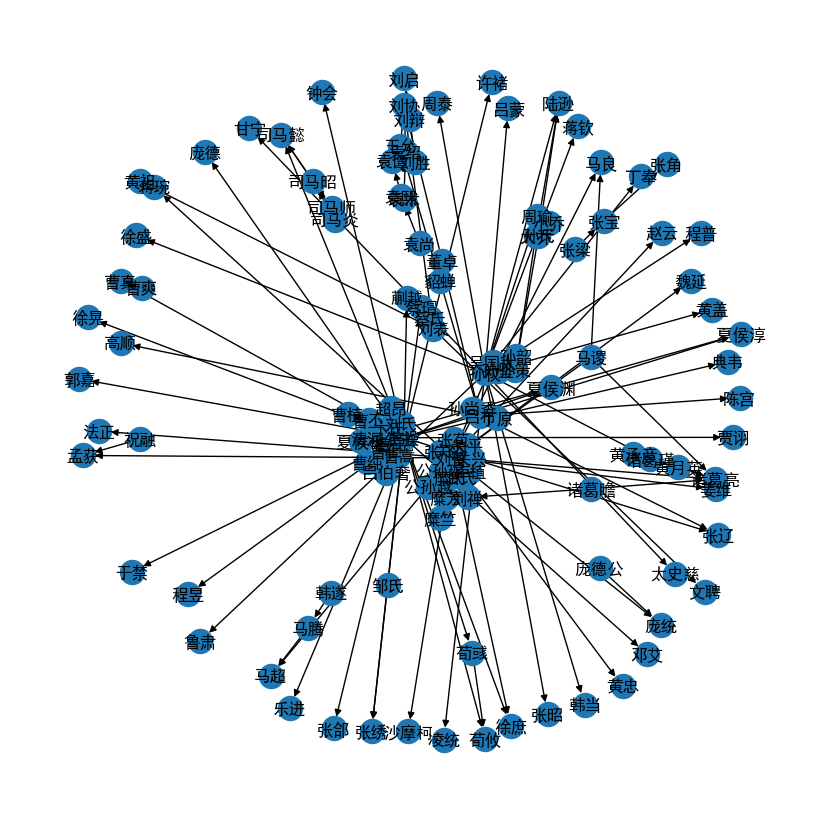

In [10]:
G=nx.DiGraph()
edges=list(zip(df['head'],df['tail']))
G.add_edges_from(edges)
pos=nx.spring_layout(G,seed=123)
plt.figure(figsize=(8,8))
nx.draw(G,pos=pos,with_labels=True)

# 查看相关属性

In [14]:
# 查看连接
print(G.edges('关羽'))
# 查看全图参数
print(G)
# 查看节点和边
print(len(G),G.size())
# 查看所有节点
print(G.nodes())
# 查看所有边
print(G.edges())

[('关羽', '刘备'), ('关羽', '张飞')]
DiGraph with 123 nodes and 144 edges
123 144
['关羽', '刘备', '张飞', '张苞', '关兴', '关平', '卢植', '公孙瓒', '甘氏', '刘禅', '诸葛瞻', '诸葛亮', '姜维', '黄月英', '黄承彦', '诸葛瑾', '公孙越', '马超', '马腾', '韩遂', '徐庶', '曹操', '刘胜', '刘启', '刘辩', '孙权', '孙尚香', '糜氏', '糜芳', '糜竺', '魏延', '赵云', '黄忠', '庞统', '法正', '蒋琬', '马良', '孟获', '沙摩柯', '庞德公', '马谡', '祝融', '孙韶', '孙策', '孙氏', '陆逊', '刘协', '董卓', '王允', '貂蝉', '吕布', '丁原', '高顺', '陈宫', '张辽', '刘表', '蔡氏', '蔡瑁', '蒯越', '黄祖', '文聘', '张宝', '张角', '张梁', '袁绍', '袁术', '袁谭', '袁熙', '袁尚', '吴国太', '孙坚', '大乔', '小乔', '周瑜', '丁奉', '徐盛', '鲁肃', '张昭', '蒋钦', '太史慈', '周泰', '凌统', '吕蒙', '甘宁', '黄盖', '韩当', '程普', '曹嵩', '吕伯奢', '邹氏', '张绣', '清河公主', '夏侯楙', '夏侯渊', '夏侯淳', '曹真', '曹爽', '郭嘉', '徐晃', '乐进', '张郃', '许褚', '典韦', '荀彧', '荀攸', '贾诩', '司马懿', '程昱', '于禁', '邓艾', '钟会', '庞德', '司马师', '司马昭', '司马炎', '曹仁', '曹纯', '曹昂', '刘氏', '超昂', '卞氏', '曹丕', '曹植']
[('关羽', '刘备'), ('关羽', '张飞'), ('刘备', '诸葛亮'), ('刘备', '马超'), ('刘备', '徐庶'), ('刘备', '姜维'), ('刘备', '糜芳'), ('刘备', '糜竺'), ('刘备', '魏延'), ('刘备', '赵云'), ('刘备', '黄忠'), ('刘备', '庞

# 保存并载入为邻接表

In [15]:
for line in nx.generate_adjlist(G):
    print(line)

关羽 刘备 张飞
刘备 诸葛亮 马超 徐庶 姜维 糜芳 糜竺 魏延 赵云 黄忠 庞统 法正 蒋琬 马良 孟获 沙摩柯
张飞 刘备
张苞 张飞
关兴 关羽
关平 张苞 关羽
卢植 刘备
公孙瓒 刘备
甘氏 刘备
刘禅 甘氏
诸葛瞻 刘禅 诸葛亮
诸葛亮 姜维
姜维 诸葛亮
黄月英 诸葛亮
黄承彦 黄月英
诸葛瑾 诸葛亮
公孙越 公孙瓒
马超
马腾 马超
韩遂 马腾
徐庶
曹操 徐庶 张辽 蒯越 蔡瑁 张绣 夏侯淳 夏侯渊 曹真 郭嘉 徐晃 乐进 张郃 许褚 典韦 荀彧 荀攸 贾诩 司马懿 程昱 于禁 邓艾 钟会 庞德
刘胜 刘启
刘启
刘辩 刘启
孙权 诸葛瑾 孙策 周瑜 陆逊 丁奉 徐盛 鲁肃 张昭 蒋钦 太史慈 周泰 凌统 吕蒙 甘宁 黄盖 韩当 程普
孙尚香 刘备 吴国太
糜氏 刘备
糜芳 糜氏
糜竺 糜芳
魏延
赵云
黄忠
庞统
法正
蒋琬
马良
孟获
沙摩柯
庞德公 庞统
马谡 马良 诸葛亮 刘备
祝融 孟获
孙韶 孙策
孙策 孙坚
孙氏 陆逊 孙策
陆逊
刘协 刘辩
董卓 刘协 吕布
王允 刘协
貂蝉 王允 吕布
吕布 高顺 陈宫 张辽
丁原 吕布
高顺
陈宫
张辽
刘表 刘协 黄祖 文聘
蔡氏 刘表
蔡瑁 蔡氏
蒯越 蔡瑁
黄祖
文聘
张宝 张角
张角
张梁 张宝
袁绍 刘协
袁术 袁绍
袁谭 袁绍
袁熙 袁谭
袁尚 袁熙
吴国太 孙坚 孙权
孙坚 孙权
大乔 孙策 陆逊
小乔 大乔
周瑜 小乔
丁奉
徐盛
鲁肃
张昭
蒋钦
太史慈
周泰
凌统
吕蒙
甘宁
黄盖
韩当
程普
曹嵩 曹操
吕伯奢 曹嵩
邹氏 曹操 张绣
张绣
清河公主 曹操
夏侯楙 清河公主
夏侯渊 夏侯楙 夏侯淳
夏侯淳
曹真
曹爽 曹真
郭嘉
徐晃
乐进
张郃
许褚
典韦
荀彧 荀攸
荀攸
贾诩
司马懿
程昱
于禁
邓艾
钟会
庞德
司马师 司马懿
司马昭 司马师 司马懿
司马炎 司马昭
曹仁 曹操
曹纯 曹仁
曹昂 曹操
刘氏 曹操
超昂 刘氏
卞氏 曹操
曹丕 卞氏
曹植 曹丕


In [16]:
# 导出为本地文件
nx.write_adjlist(G,'grid_adjlist',delimiter=':')

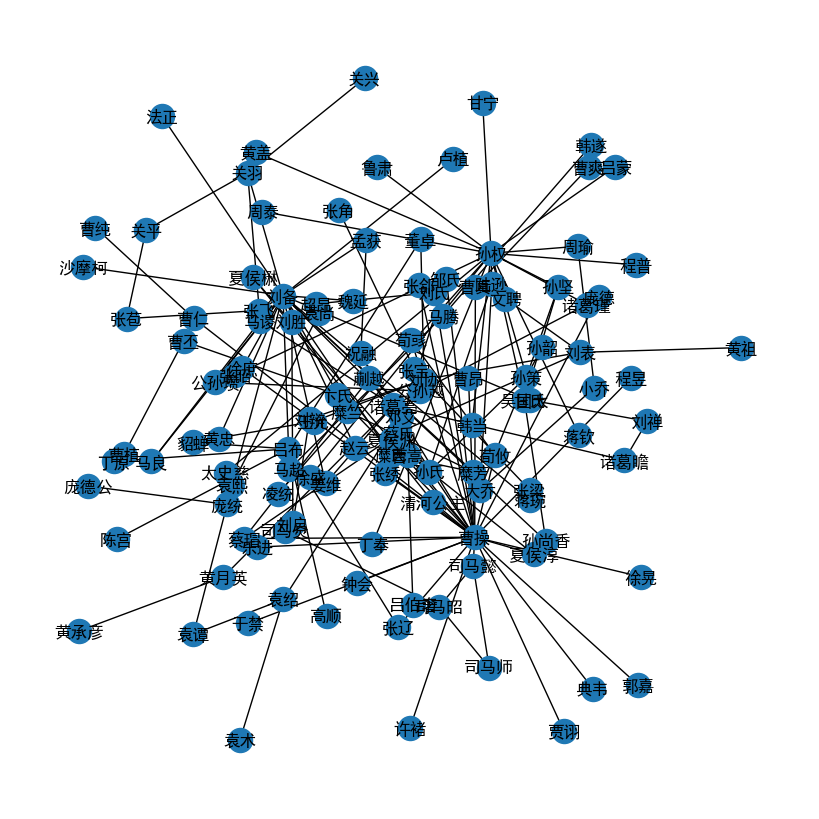

In [19]:
# 读取本地邻接表
H=nx.read_adjlist('grid_adjlist',delimiter=':')
# 可视化
pos=nx.spring_layout(H,iterations=3,seed=5)
plt.figure(figsize=(8,8))
nx.draw(H,pos=pos,with_labels=True)
plt.show()